In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import (user, password, host, port, database)

In [2]:
# Create sqlalchemy engine for our database
from sqlalchemy import create_engine, inspect
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
connection = engine.connect()

In [4]:
# Create DF using sqlalchemy engine and display resulting df for reference
df = pd.read_sql_query('SELECT * FROM employees', con = engine)
df.head()

,emp_no,title,birth_date,first_name,last_name,sex,hire_date,salary
0,57444,Engineer,1958-01-30,Berry,Babb,F,1992-03-21,48973
1,13616,Senior Engineer,1961-08-30,Perry,Lorho,F,1991-08-03,40000
2,240129,Technique Leader,1952-08-11,Roddy,Karnin,M,1985-05-29,43548
3,427958,Staff,1957-05-03,Feixiong,Poujol,F,1985-05-11,63377
4,35916,Senior Engineer,1953-08-15,Wonhee,Talmon,F,1985-03-20,40000


# Most common salary ranges for employees

In [116]:
# find min and max salary and display
salary_min = df['salary'].min()
salary_max = df['salary'].max()
print(f"Minimum Employee Salary: {salary_min}")
print(f"Maximum Employee Salary: {salary_max}")

Minimum Employee Salary: 40000
Maximum Employee Salary: 129492


In [62]:
# Create bins for salary ranges
df['bin'] = pd.cut(df['salary'], [20000, 50000, 70000, 90000, 130000])

# Create salary count df based on bin values
salary_count = df['bin'].value_counts()
salary_count_df = salary_count.to_frame()
salary_count_df.reset_index(level=0, inplace=True)

# Clean up index look for visualization
salary_count_df['index'] = salary_count_df['index'].astype(str)
salary_count_df['index'] = salary_count_df['index'].str.replace('(','$')
salary_count_df['index'] = salary_count_df['index'].str.replace(', ',' - ')
salary_count_df['index'] = salary_count_df['index'].str.replace(']','')
salary_count_df

,index,bin
0,$20000 - 50000,158472
1,$50000 - 70000,99322
2,$70000 - 90000,36658
3,$90000 - 130000,5572


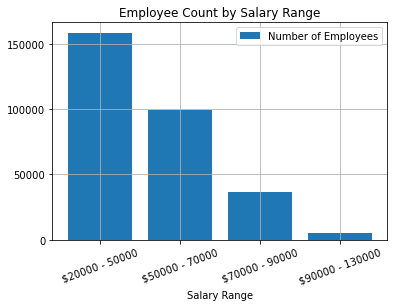

In [73]:
# Set tick marks
x_axis = np.arange(len(salary_count))
tick_locations = [value for value in x_axis]

# Create bar chart using pandas with proper readability
plt.bar(x_axis, salary_count, align='center', label='Number of Employees')
plt.xticks(tick_locations, salary_count_df['index'], rotation=20)
plt.yticks(np.arange(0, salary_count_df['bin'].max(), 50000))

# Set a Title and labels
plt.title("Employee Count by Salary Range")
plt.xlabel("Salary Range")
plt.grid(zorder=0)

# Add legend
plt.legend(loc='upper right')

plt.show()

# Average salary by employee title

In [115]:
# Create df grouped by employee title
title_group = df.groupby(['title'])
title_group_df = title_group[['salary']].mean().round(decimals=2)

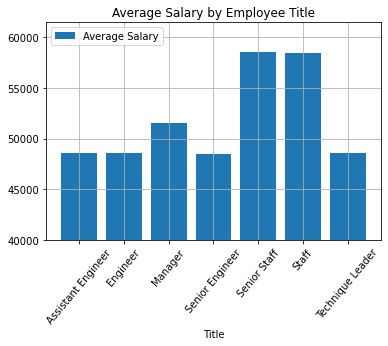

In [114]:
# Set tick marks
x_axis = np.arange(title_group_df['salary'].count())
tick_locations = [value for value in x_axis]

# Create bar chart using pandas with proper readability
plt.bar(x_axis, title_group_df['salary'], align='center', label='Average Salary')
plt.xticks(tick_locations, title_group_df.index.tolist(), rotation=50)
plt.yticks(np.arange(0, title_group_df['salary'].max()+5000, 5000))
plt.ylim(salary_min)

# Set a Title and labels
plt.title("Average Salary by Employee Title")
plt.xlabel("Title")
plt.grid(zorder=0)

# Add legend
plt.legend(loc='upper left')

plt.show()